# MA332 Project 1: Numerical Root Finding

Newton's Method
$$
x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sys

In [14]:
def newton(f, df, x, iter=1000, tol=1e-3):
    ''' Finds the root of function f with derivative df using Newton's method starting at x'''
    
    x_n = []  # list to hold guesses
    
    for i in range(iter):
        
        x_n.append(x)
        prev_x = x

        # update approximation
        try: x = x - f(x)/df(x)
        except ZeroDivisionError:
            return None

        if abs(x - prev_x) < tol: # check stopping condition
            return x_n  

    return x_n

First define $ g(x) $ and $ \frac{dg(x)}{dx} $:

In [3]:
def g(x): return (x - 1)*(x + 3)

def dg(x): return (x - 1) + (x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [4]:
x = np.linspace(-4, 2, 100)
y = g(x)

Find roots starting at each point:

In [15]:
roots  = []
for i in range(100):
    approx = newton(g, dg, x[i])
    roots.append(round(approx[-1], 2))

# copy of roots array with first and last values removed
trimmed = np.empty(98)
trimmed = roots[1:-1]

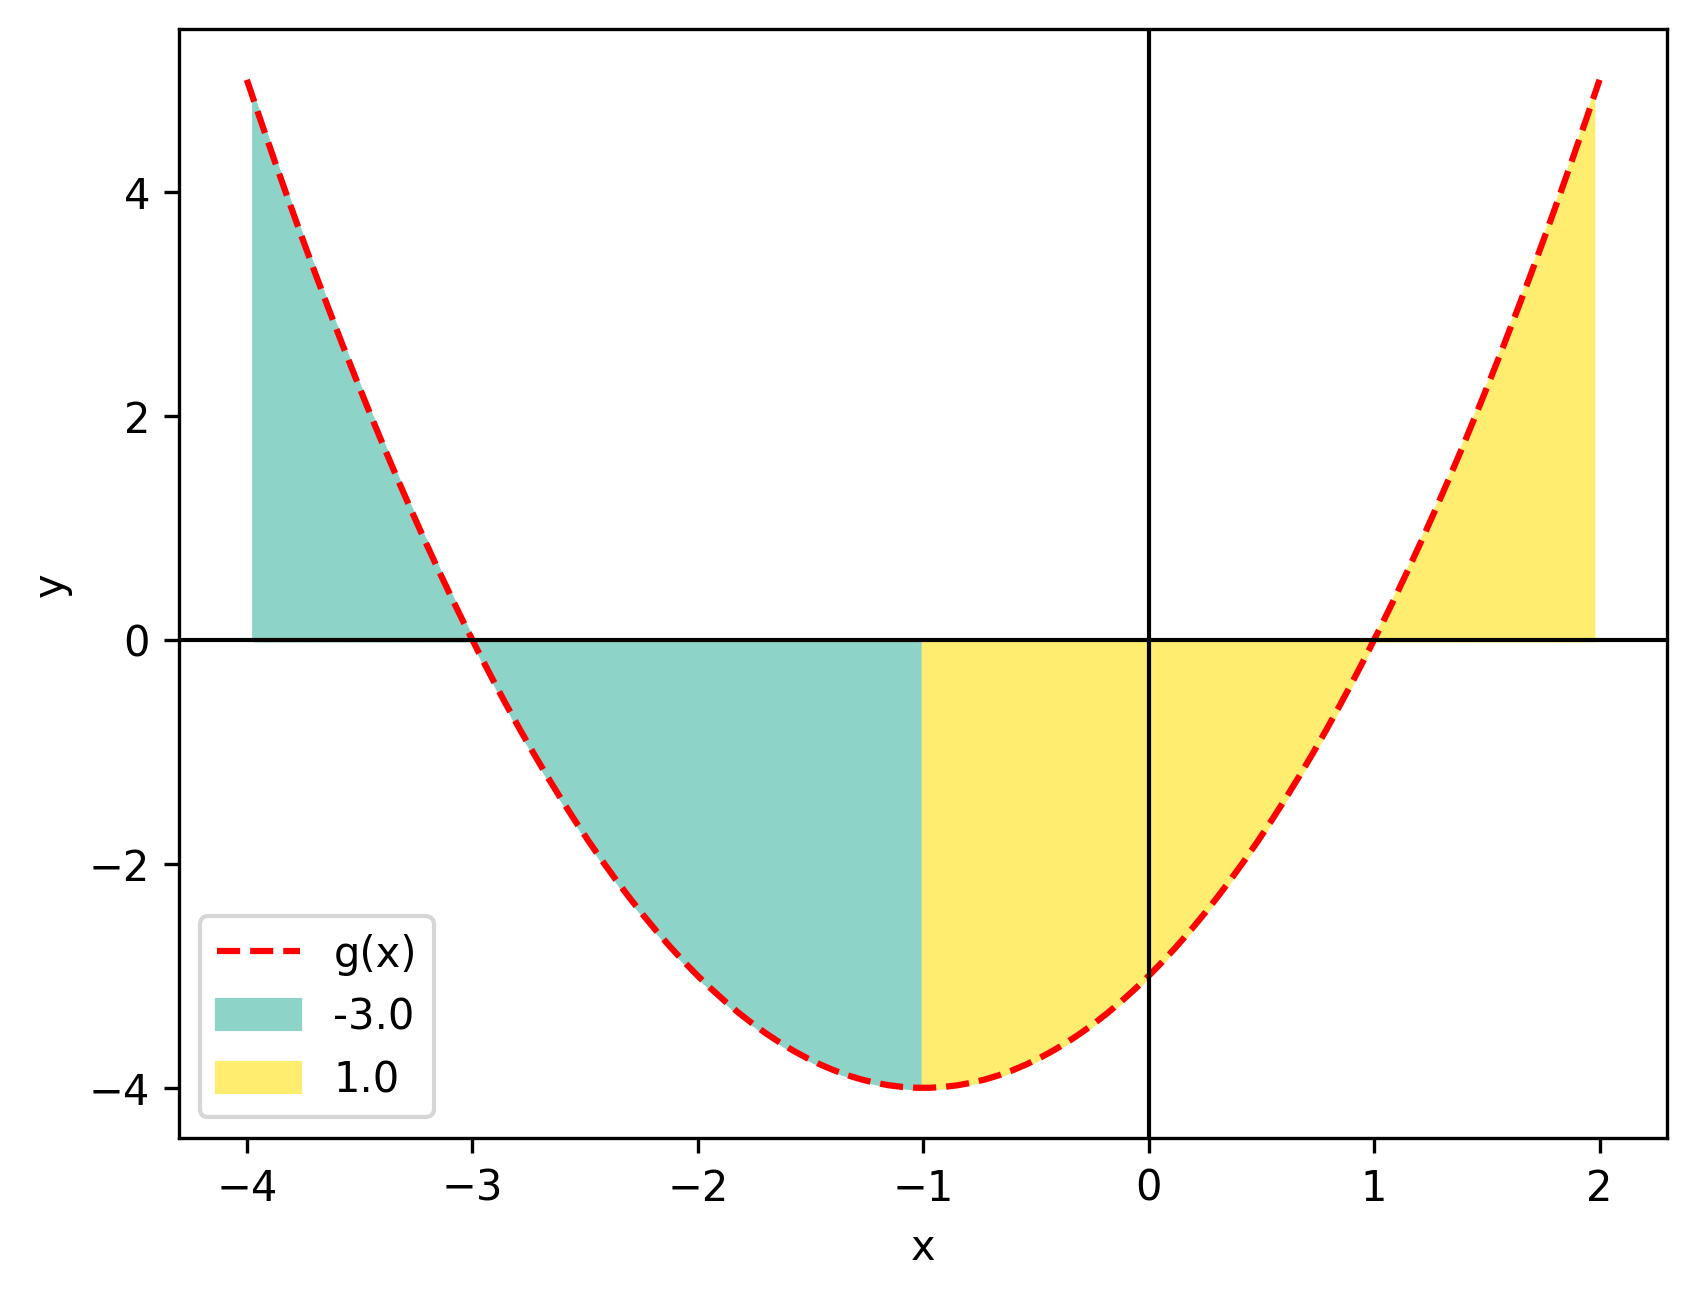

In [22]:
cmap=matplotlib.colormaps['Set3']
colors = cmap(roots)

# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'r--',label='g(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=1)
axes.axhline(color='Black', lw=1)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()
plt.savefig('Report/figures/figure1.png')
plt.show()

First define $ h(x) $ and $ \frac{dh(x)}{dx} $:

In [27]:
def h(x): return (x - 4)*(x - 1)*(x + 3)

def dh(x): return (x - 4)*(x - 1) + (x - 1)*(x + 3) + (x - 4)*(x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [38]:
x = np.linspace(-4, 5, 100)
y = h(x)

Find roots starting at each point:

In [41]:
roots  = []
for i in range(100):
    approx = newton(h, dh, x[i])
    roots.append(round(approx[-1], 2))
print(roots)
# copy of roots array with first and last values removed
trimmed = np.empty(98)
trimmed = roots[1:-1]

[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 4.0, 4.0, 4.0, 4.0, 4.0, -3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, -3.0, -3.0, -3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


[-3.  1.  4.] [ 1 36 30]


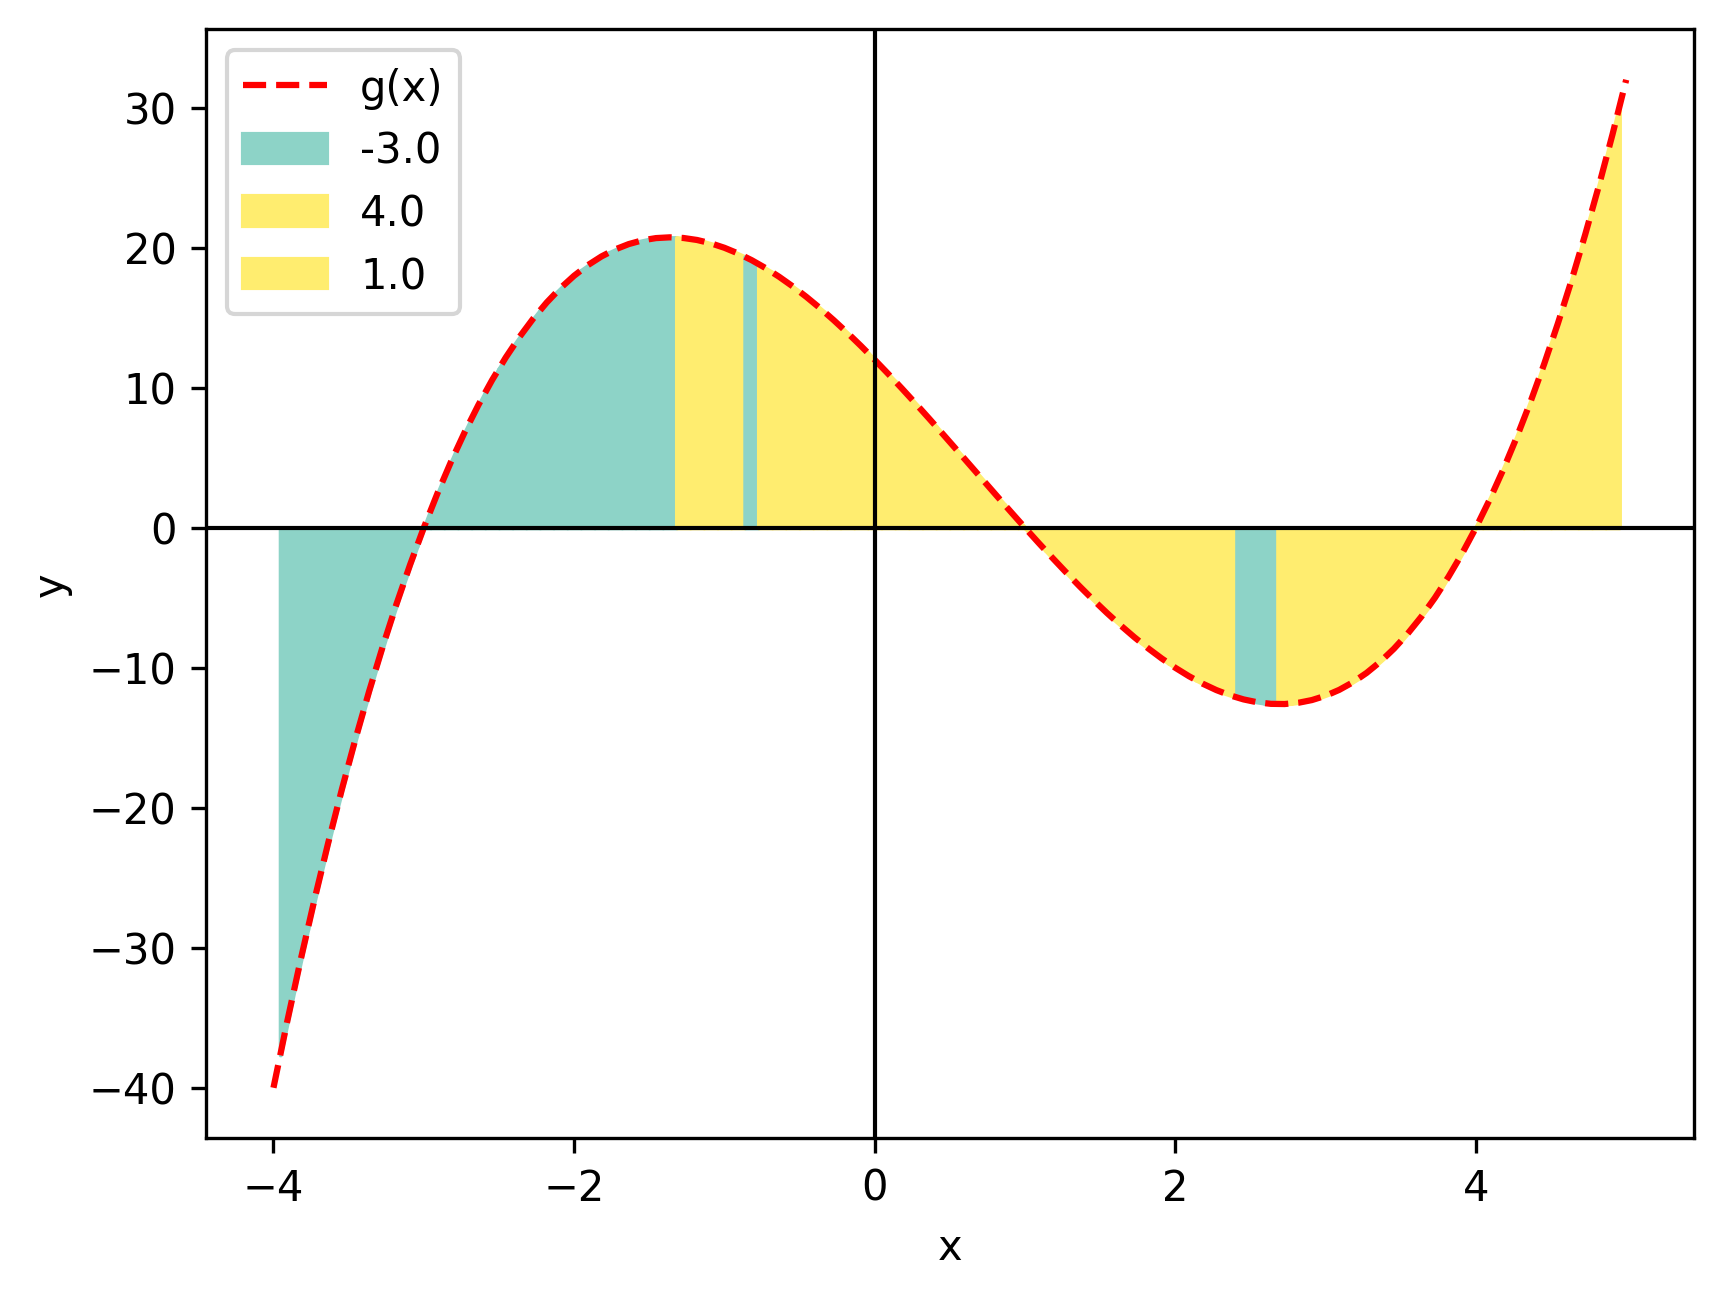

In [40]:
cmap=matplotlib.colormaps['Set3']
colors = cmap(roots)

# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1
print(_, root_indices)

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'r--',label='g(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=1)
axes.axhline(color='Black', lw=1)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()
plt.savefig('Report/figures/figure1.png')
plt.show()

In [110]:
def check_convergence(f, df, x1, x2, n=100, tol=1e-6):

    results = np.empty(n)

    test_x = np.linspace(x1, x2, n)

    for i in range(n):

        results[i] = newton(f, df, test_x[i], tol)

    return test_x, f(test_x), results

In [148]:
def plot_convergence(axes, f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        if np.isnan(roots[i]):

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    print(np.unique(np.asarray(roots)))

In [91]:
def color_convergence(f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    fig, axes = plt.subplots()

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        print(roots[i])
        if roots[i] == np.nan:

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    plt.legend()
    plt.show()

[-1.771    nan]


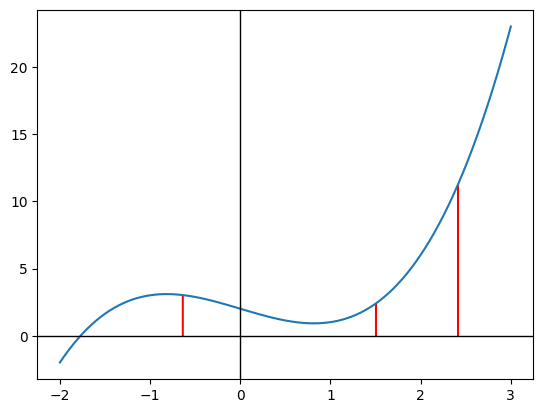

In [152]:
g = lambda x: x**3 - 2*x + 2.01626
dg = lambda x: 3*x**2 - 2

fig, axes = plt.subplots()
plot_convergence(axes, g, dg, -2, 3, n=1000)
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation

fig, axes = plt.subplots()

def animate(t):
    axes.plot()